# Import libraries

In [23]:
############################Initialization############################
RANDOM_SEED = 1 # seed value for random number generator             
import numpy as np
from scipy import stats as st
import pandas as pd
import time
import matplotlib.pyplot as plt  #plots
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Random Forest package
from sklearn.model_selection import KFold
import os #manage files
os.chdir('C:\\Users\\A4 Dell\\Desktop\\Northwestern University\\Practical Machine Learning\\week5')
#####################################################################

# Read in data and prepare data

In [24]:
train = pd.read_csv('train.csv') #read in train data
test = pd.read_csv('test.csv') #read in test data
print(len(train))
print(len(test))

42000
28000


In [73]:
y = train["label"]
X = train.drop('label', 1)  #drop label variable
print(X.shape)     #dataframe size
print(list(X.columns))   #check the columns of dataframe

(42000, 784)
['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel

# Fitting Random Forest Classifier with Full Variables

# Initial Random Forest Classifier

In [27]:
RANDOM_SEED = 1  # Seed value for random number generators to obtain reproducible results

start_time = time.time()
rf = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', bootstrap=True, n_jobs = -1, 
                                    random_state = RANDOM_SEED)
rf.fit(X,y)
print(time.time()-start_time)    #benchmark the running time for the initial random forest classifier

5.7312657833099365


In [28]:
#test the RF classifier to create Kaggle submission file 1
prediction = rf.predict(test)
print(prediction[0:50])
pd.DataFrame({"ImageId":list(range(1,len(prediction)+1)),
                 "Label":prediction}).to_csv("rf_kaggle_submission1.csv", index=False, header=True)

# Kaggle Score: 0.96557

[2 0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 2 6 7]


# Grid Search

In [33]:
#set up the search grid
from sklearn.model_selection import RandomizedSearchCV    #Randomized search on hyper parameters
criterion = ['entropy', 'gini']
n_estimators = [100, 150, 200]
random_grid = {'criterion':criterion, 'n_estimators':n_estimators}

#grid search for parameters
rf_random = RandomizedSearchCV(estimator = rf, #initial random forest classifier
                    param_distributions = random_grid, 
                    n_iter = 10,  #number of parameter settings that are sampled, trades off runtime vs quality of the solution.
                    cv = 2,  #two folds in KFold,
                    verbose = 2, 
                    n_jobs = -1, #using all processors to run jobs in parallel
                    random_state = RANDOM_SEED)

rf_random.fit(X,y)

C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   45.9s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.2min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ['entropy', 'gini'], 'n_estimators': [100, 150, 200]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [34]:
#the selected best parameters
rf_random.best_params_

{'n_estimators': 200, 'criterion': 'gini'}

# Random Forest Classifier with Hyper Parameters from Grid Search

In [35]:
start_time = time.time()
rf_selected = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_features = 'sqrt', 
                                     bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED)

rf_selected.fit(X,y)
print(time.time()-start_time)    #get the running time for the random forest classifier

10.772618293762207


In [36]:
#print out the current parameters
print('Parameters currently in use:\n')
print(rf_selected.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [38]:
#test this random forest classifier to create Kaggle submission file 2
prediction2 = rf_selected.predict(test)
print(prediction2[0:50])
pd.DataFrame({"ImageId":list(range(1,len(prediction2)+1)),
                 "Label":prediction2}).to_csv("rf_kaggle_submission2.csv", index=False, header=True)

# Kaggle Score: 0.96657

[2 0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 9 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 2 6 7]


# Principal Component Analysis

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

#combine the training and test sets!
X_new = np.concatenate((X, test), axis=0)  

start_time = time.time()
X_new = StandardScaler().fit_transform(X_new)   #standardize the data

pca = PCA(n_components=0.95)   #the amount of variance that needs to be explained is >= 95%

pca.fit(X_new)  #perform PCA

totimages = pca.transform(X_new)   #Apply dimensionality reduction to X_new

print(pca.n_components_, ' principal components can explain 95% of the variance')
print(time.time()-start_time)    #get the running time for PCA
print(len(X_new))

C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


332  principal components can explain 95% of the variance
15.872324466705322
70000


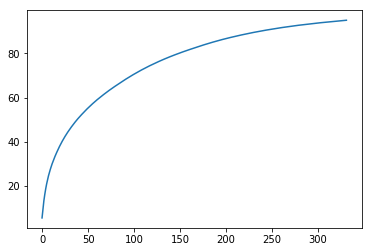

In [43]:
#Cumulative Variance explains
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)

# After PCA, rebuild the training and test sets

In [46]:
#After the dimensionality reduction using PCA, split training and test data
train_new = totimages[0:42000, :]  #the first 42,000 records belong to training set
print(train_new.shape)     #dataframe size

test_new = totimages[42000:70000, :]  #the remaining records belong to test set
print(test_new.shape)     #dataframe size

(42000, 332)
(28000, 332)


In [47]:
print(test_new[0:50, 1])  #check the data type

[ -4.60830726  -0.15115159  -0.32935218  -0.23786206  -2.75632682
   8.0477184   -8.96742921  -3.69168935  -2.52629711  -1.74275823
   2.14104782  -0.8364784    5.85251828   0.66956929   5.87760624
   2.98597871   7.77953596  -0.30658162   6.43930419   1.03449179
   6.80516221  -1.95876369  -4.48213941  -6.63737101   7.27638792
   0.71960965 -10.62521351  14.23022894  -1.7341803    0.37240654
  -2.98102711  -1.40410339   3.02242402  -1.96258289  -5.24209455
   9.17691268   0.50323571  -6.18987887   2.0056347    1.7088639
  -0.03877526  10.41030478  -1.21870434   8.41415536   3.31907732
  14.07273985   0.53204878  -4.658736    -2.39457895  -1.80116199]


In [48]:
#The standardized data are float type. 
#Need to convert the float numbers to integers for fair comparison
train_new = train_new.astype(int)
test_new = test_new.astype(int)

In [49]:
print(test_new[0:50, 1])   #check the data type again

[ -4   0   0   0  -2   8  -8  -3  -2  -1   2   0   5   0   5   2   7   0
   6   1   6  -1  -4  -6   7   0 -10  14  -1   0  -2  -1   3  -1  -5   9
   0  -6   2   1   0  10  -1   8   3  14   0  -4  -2  -1]


# Refit Random Forest Classifier with the Principal Components

In [50]:
start_time = time.time()
rf_selected_pca = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_features = 'sqrt', 
                                     bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED)

rf_selected_pca.fit(train_new,y)
print(time.time()-start_time)    #get the running time for the random forest classifier

6.503935098648071


In [52]:
#test this random forest classifier to create Kaggle submission file 3
prediction3 = rf_selected_pca.predict(test_new)
print(prediction3[0:50])
pd.DataFrame({"ImageId":list(range(1,len(prediction3)+1)),
                 "Label":prediction3}).to_csv("rf_kaggle_submission3.csv", index=False, header=True)

# Kaggle Score: 0.93657

[2 0 4 4 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 7 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 8 6 7]


# Only Use Training Data for PCA model

In [75]:
start_time = time.time()
X_scaled = StandardScaler().fit_transform(X)   #standardize the data

pca_traindata = PCA(n_components=0.95)   #the amount of variance that needs to be explained is >= 95%

pca_traindata.fit(X_scaled)  #perform PCA

traindata = pca_traindata.transform(X_scaled)   #Apply dimensionality reduction to X

print(pca_traindata.n_components_,' principal components can explain 95% of the variance')
print(time.time()-start_time)    #get the running time for PCA
print(len(X_scaled))

C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


320  principal components can explain 95% of the variance
9.321559429168701
42000


# Transform the test data using the above fitted PCA

In [81]:
test_scaled = StandardScaler().fit_transform(test)  #need to standardize test data before applying PCA
test_scaled.shape

C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\A4 Dell\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(28000, 784)

In [82]:
testdata = pca_traindata.transform(test_scaled)   # transform test data using already fitted pca 

In [83]:
testdata.shape  #check how many principal components remain in test data after the PCA transformation

(28000, 320)

In [84]:
traindata = traindata.astype(int) #convert the float numbers to integers
print(traindata[0:50, 1])   #check the data type 
testdata = testdata.astype(int)
print(testdata[0:50, 1])   #check the data type

[ -5   6  -1   5   6   0   6   4  -1  -2  -5  -2  -1  14   0  -1   6 -10
   1   5  -5  -7   0   4   7  -4   0  -2   0  13  -8   4   0  -1   1   0
   1  -3  -2   0   0  -2   5   1   3  -4   0   9  -2   2]
[ -4   0   0   0  -3   8  -8  -4  -2  -2   2   0   5   1   6   2   7   0
   6   1   7  -2  -4  -6   7   0 -10  15  -1   0  -2  -1   3  -2  -5   8
   0  -5   1   1   0  10   0   8   3  14   0  -5  -2  -1]


# Finally Refit RF Classifier again with the new set of Principal Components

In [85]:
start_time = time.time()
rf_selected_pca_2 = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_features = 'sqrt', 
                                     bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED)

rf_selected_pca_2.fit(traindata,y)
print(time.time()-start_time)    #get the running time for the random forest classifier

5.994556188583374


In [86]:
#test this random forest classifier to create Kaggle submission file 4
prediction4 = rf_selected_pca_2.predict(testdata)
print(prediction4[0:50])
pd.DataFrame({"ImageId":list(range(1,len(prediction4)+1)),
                 "Label":prediction4}).to_csv("rf_kaggle_submission4.csv", index=False, header=True)

# Kaggle Score: 0.93757

[2 0 4 4 3 7 0 3 0 3 5 7 3 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 7 7 7 5 4 2 6 2 9
 5 1 6 7 7 4 9 8 7 8 8 6 7]
